In [3]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
import pickle
import imageio
from collections import namedtuple

# Use solarized light theme!
from IPython.display import display, HTML
with open('variables-solarized-dark-test.css') as f:
    css = f.read().replace(';', ' !important;')
display(HTML('<style type="text/css">%s</style>Customized changes loaded.'%css))

In [4]:
# mndata = MNIST('/home/ubuntu/Pictures/handwritten_digits/')
# images, labels = mndata.load_training()

In [5]:
with open("/home/ubuntu/Pictures/handwritten_digits/images.pkl", 'rb') as infile:
    images = pickle.load(infile)
with open("/home/ubuntu/Pictures/handwritten_digits/labels.pkl", 'rb') as infile:
    labels = pickle.load(infile)

In [7]:
im1 = images[0]

In [8]:
im1[0]

0

In [9]:
im1_arr = []
for row in range(28):
    im1_arr.append([])
    for col in range(28):
        try:
            im1_arr[row].append(im1[row * 28 + col])
        except:
            print(f"row: {row}    col: {col}")

In [10]:
arr1 = np.array(im1_arr)

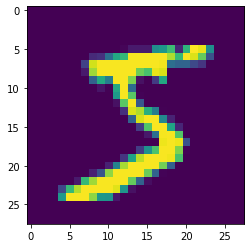

In [11]:
plt.imshow(arr1)

In [12]:
labels[0]

5

In [6]:
sudoku_board_img = imageio.imread('/home/ubuntu/Documents/projects/python/sudoku-hinter/sudoku_images/9x9_clean.png')
sudoku_board_img.shape

(213, 213, 4)

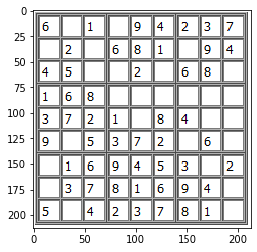

In [7]:
plt.imshow(sudoku_board_img)

(213, 213)


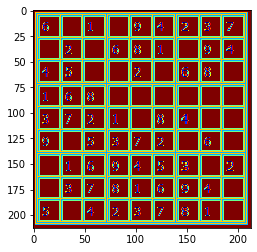

In [8]:
sudoku_board_img_bw = imageio.imread('/home/ubuntu/Documents/projects/python/sudoku-hinter/sudoku_images/9x9_clean.png', pilmode="L")
print(sudoku_board_img_bw.shape)
plt.imshow(sudoku_board_img_bw, cmap=plt.cm.jet)

In [9]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks

coords = corner_peaks(corner_harris(sudoku_board_img_bw), min_distance=3, threshold_rel=0.02)
coords_subpix = corner_subpix(sudoku_board_img_bw, coords, window_size=13)

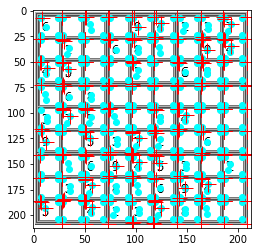

In [10]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
# ax.axis((0, 310, 200, 0))
plt.show()

In [18]:
coords

array([[ 36, 102],
       [ 82,  56],
       [104, 124],
       [172,  80],
       [ 58, 170],
       [194, 148],
       [ 87,  12],
       [199, 170],
       [109,  80],
       [ 19,  56],
       [177, 102],
       [155,  34],
       [ 41, 124],
       [152,  56],
       [ 38,  80],
       [ 60, 148],
       [128, 170],
       [ 84,  34],
       [ 16,  12],
       [174, 124],
       [108, 148],
       [ 40, 192],
       [ 62,  12],
       [176, 170],
       [ 18, 124],
       [154, 102],
       [198,  56],
       [ 38, 170],
       [152,  80],
       [128,  12],
       [ 16, 102],
       [174, 148],
       [108, 124],
       [176,  80],
       [ 40, 102],
       [198, 148],
       [ 86,  56],
       [ 62, 170],
       [ 13,  55],
       [103,  79],
       [149,  33],
       [ 35, 123],
       [193, 169],
       [171, 101],
       [ 81,  11],
       [156, 190],
       [200,  78],
       [ 42,  32],
       [ 64, 100],
       [132, 122],
       [ 20, 146],
       [110,  54],
       [ 12,

In [19]:
coords_subpix

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
 

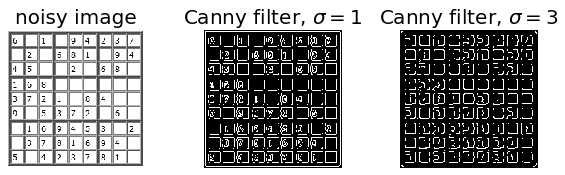

In [11]:
from scipy import ndimage as ndi
from skimage import feature


# Compute the Canny filter for two values of sigma
edges1 = feature.canny(sudoku_board_img_bw)
edges2 = feature.canny(sudoku_board_img_bw, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

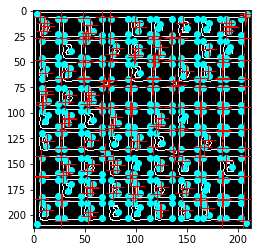

In [12]:
coords = corner_peaks(corner_harris(edges1), min_distance=3, threshold_rel=0.02)
coords_subpix = corner_subpix(edges1, coords, window_size=13)
fig, ax = plt.subplots()
ax.imshow(edges1, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
# ax.axis((0, 310, 200, 0))
plt.show()

In [22]:
sorted(coords[:, 1])

[3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 13,
 14,
 14,
 14,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 32,
 32,
 33,
 33,
 33,
 34,
 35,
 36,
 36,
 36,
 36,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 53,
 53,
 54,
 54,
 54,
 55,
 55,
 56,
 56,
 57,
 57,
 58,
 58,
 58,
 58,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 72,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 77,
 78,
 78,
 79,
 80,
 80,
 81,
 82,
 82,
 82,
 82,
 82,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 99,
 100,
 100,
 100,
 101,
 101,
 102,
 102,
 103,
 104

In [23]:
###First attempt, using corner detection to partition into squares

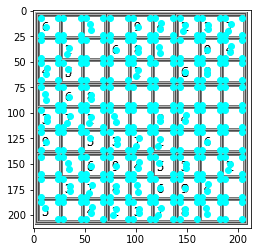

In [13]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks

# `corner_peaks` returns coords as row-column tuples, which is effectively a (y, x) pair, rather than an (x, y) pair 
coords = corner_peaks(corner_harris(sudoku_board_img_bw), min_distance=3, threshold_rel=0.02)
coords_subpix = corner_subpix(sudoku_board_img_bw, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [25]:
coords[:10]

array([[ 36, 102],
       [ 82,  56],
       [104, 124],
       [172,  80],
       [ 58, 170],
       [194, 148],
       [ 87,  12],
       [199, 170],
       [109,  80],
       [ 19,  56]])

In [26]:
coords[:, 1][:10]

array([102,  56, 124,  80, 170, 148,  12, 170,  80,  56])

In [27]:
square = np.zeros([10, 10])
square[1:7, 2:8] = 1
square.astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [28]:
corner_peaks(corner_harris(square), min_distance=1, threshold_rel=0)

array([[1, 2],
       [1, 7],
       [6, 2],
       [6, 7]])

In [14]:
x_min = min(sorted(coords[:, 1]))
x_max = max(sorted(coords[:, 1]))
y_min = min(sorted(coords[:, 0]))
y_max = max(sorted(coords[:, 0]))

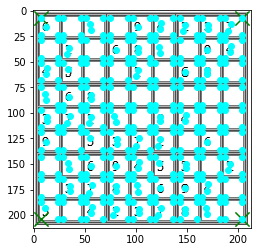

In [15]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.scatter([x_min, x_min, x_max, x_max], [y_min, y_max, y_min, y_max], color='g', marker="x", s=202)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [16]:
x_range = (x_min + cell_interval - pos_error, x_min + cell_interval + pos_error)
x_range

NameError: name 'cell_interval' is not defined

In [32]:
# cell_interval = sudoku_board_img_bw.shape[0] // 10  # 10 strides between min and max
# pos_error = sudoku_board_img_bw.shape[0] // 40  # Error is 4% sudoku board's side length
cell_interval = np.average([x_max - x_min, y_max - y_min]) // 10
pos_error = (x_range[1] - x_range[0]) // 30

NameError: name 'x_range' is not defined

In [17]:
cell_interval

NameError: name 'cell_interval' is not defined

In [34]:
x_sec_col = np.array([point for point in coords if x_range[0] <= point[1] <= x_range[1]])
x_sec_col

NameError: name 'x_range' is not defined

NameError: name 'x_sec_col' is not defined

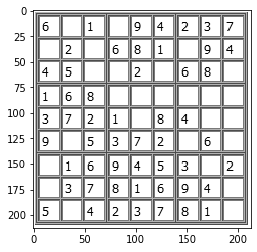

In [18]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
ax.plot(x_sec_col[:, 1], x_sec_col[:, 0], color='cyan', marker='o', markersize=6)
ax.scatter([x_min, x_min, x_max, x_max], [y_min, y_max, y_min, y_max], color='g', marker="x", s=202)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [ ]:
x_range_third_col = (x_min + cell_interval * 2 - pos_error, x_min + cell_interval * 2 + pos_error)
x_range_third_col

In [37]:
x_third_col = np.array([point for point in coords if x_range_third_col[0] <= point[1] <= x_range_third_col[1]])
x_third_col

NameError: name 'x_range_third_col' is not defined

NameError: name 'x_sec_col' is not defined

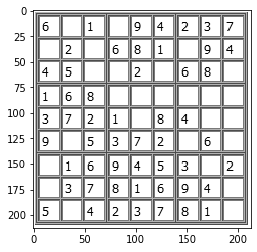

In [38]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
ax.plot(x_sec_col[:, 1], x_sec_col[:, 0], color='cyan', marker='o', markersize=6)
ax.plot(x_third_col[:, 1], x_third_col[:, 0], color='cyan', marker='o', markersize=6)
ax.scatter([x_min, x_min, x_max, x_max], [y_min, y_max, y_min, y_max], color='g', marker="x", s=202)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [19]:
cols = []
for cell in range(10):  # 10 strides from side to side of sudoku square
    x_range = (x_min + cell_interval * cell - pos_error, x_min + cell_interval * cell + pos_error)
    x_cols = np.array([point for point in coords if x_range[0] <= point[1] <= x_range[1]])
    cols.append(x_cols)

    # Count left from right-hand side
    x_range = (x_max - cell_interval * cell - pos_error, x_max - cell_interval * cell + pos_error)
    x_cols = np.array([point for point in coords if x_range[0] <= point[1] <= x_range[1]])
    cols.append(x_cols)
    
cols

NameError: name 'cell_interval' is not defined

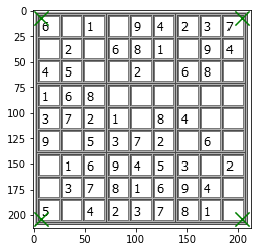

In [20]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
for col in cols:
    try:
        ax.plot(col[:, 1], col[:, 0], color='cyan', marker='o', markersize=6)
    except IndexError:
        print(col)
ax.scatter([x_min, x_min, x_max, x_max], [y_min, y_max, y_min, y_max], color='g', marker="x", s=202)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [21]:
cells = []
for idx, col in enumerate(cols[:-1]):
    descending_col = sorted(col, key=lambda x: x[0])
    # we approach each `coord` here as though it were the top-left corner of its cell, then we try to find its other
    # three corners
    for coord in col:
        bottom_left_coord_candidates = [x for x in col if coord[0] + cell_interval - pos_error <= x[0] <= coord[0] + cell_interval + pos_error]
        top_right_coord_candidates = [x for x in cols[idx + 1] if coord[0] - pos_error <= x[0] <= coord[0] + pos_error]
        bottom_right_coord_candidates = [x for x in cols[idx + 1] if coord[0] - pos_error <= x[0] <= coord[0] + pos_error]
        print(f"coord: {coord}")
        print(f"bottom_left_coord_candidates: {bottom_left_coord_candidates}")
        print(f"top_right_coord_candidates: {top_right_coord_candidates}")
        print(f"bottom_right_coord_candidates: {bottom_right_coord_candidates}")

In [22]:
descending_col = sorted(cols[0], key=lambda x: x[0])

IndexError: list index out of range

In [23]:
descending_col

NameError: name 'descending_col' is not defined

# Start looking at things from here!  Ignore the stuff above!

In [24]:
Square = namedtuple("Square", ["top_left", "bottom_left", "top_right", "bottom_right"])
Coord = namedtuple("Coord", ["x", "y"])

In [25]:
# TODO: Make this allow for independent intervals for x and y, in case the axes are scaled differently
cell_interval = np.average([x_max - x_min, y_max - y_min]) // 9

squares = []
sudoku_size = 9
for row in range(sudoku_size):
    for col in range(sudoku_size):
#         top_left     = Coord(x_min + cell_interval * row,       y_min + cell_interval * col)
#         bottom_left  = Coord(x_min + cell_interval * (row + 1), y_min + cell_interval * col)
#         top_right    = Coord(x_min + cell_interval * row,       y_min + cell_interval * (col + 1))
#         bottom_right = Coord(x_min + cell_interval * (row + 1), y_min + cell_interval * (col + 1))
# #         top_right    = Coord(x_max - cell_interval * row,       y_min + cell_interval * (row + 1))
# #         bottom_right = Coord(x_max - cell_interval * (row + 1), y_min + cell_interval * (row + 1))

        left_side   = np.average([x_min + cell_interval * row,       x_max - cell_interval * (sudoku_size - row)],
            weights=[sudoku_size - row, row])
        right_side  = np.average([x_min + cell_interval * (row + 1), x_max - cell_interval * (sudoku_size - (row + 1))],
            weights=[sudoku_size - row + 1, row + 1])
        top_side    = np.average([y_min + cell_interval * col,       y_max - cell_interval * (sudoku_size - col)],
            weights=[sudoku_size - col, col])
        bottom_side = np.average([y_min + cell_interval * (col + 1), y_max - cell_interval * (sudoku_size - (col + 1))],
            weights=[sudoku_size - col + 1, col + 1])
#        
        top_left     = Coord(left_side, top_side)
        bottom_left  = Coord(left_side, bottom_side)
        top_right    = Coord(right_side, top_side)
        bottom_right = Coord(right_side, bottom_side)
        
        squares.append(Square(top_left, bottom_left, top_right, bottom_right))

In [44]:
squares

[Square(top_left=Coord(x=7.0, y=7.0), bottom_left=Coord(x=7.0, y=28.727272727272727), top_right=Coord(x=28.727272727272727, y=7.0), bottom_right=Coord(x=28.727272727272727, y=28.727272727272727)),
 Square(top_left=Coord(x=7.0, y=28.88888888888889), bottom_left=Coord(x=7.0, y=50.45454545454545), top_right=Coord(x=28.727272727272727, y=28.88888888888889), bottom_right=Coord(x=28.727272727272727, y=50.45454545454545)),
 Square(top_left=Coord(x=7.0, y=50.77777777777778), bottom_left=Coord(x=7.0, y=72.18181818181819), top_right=Coord(x=28.727272727272727, y=50.77777777777778), bottom_right=Coord(x=28.727272727272727, y=72.18181818181819)),
 Square(top_left=Coord(x=7.0, y=72.66666666666667), bottom_left=Coord(x=7.0, y=93.9090909090909), top_right=Coord(x=28.727272727272727, y=72.66666666666667), bottom_right=Coord(x=28.727272727272727, y=93.9090909090909)),
 Square(top_left=Coord(x=7.0, y=94.55555555555556), bottom_left=Coord(x=7.0, y=115.63636363636364), top_right=Coord(x=28.727272727272727

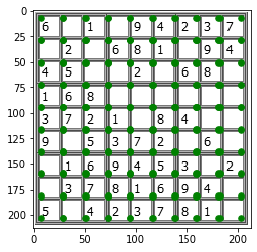

In [26]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
for square in squares:
    ax.scatter(square.top_left.x, square.top_left.y, color='g', marker="o", s=30)
    ax.scatter(square.bottom_left.x, square.bottom_left.y, color='g', marker="o", s=30)
    ax.scatter(square.top_right.x, square.top_right.y, color='g', marker="o", s=30)
    ax.scatter(square.bottom_right.x, square.bottom_right.y, color='g', marker="o", s=30)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [27]:
squares[2]

Square(top_left=Coord(x=7.0, y=50.77777777777778), bottom_left=Coord(x=7.0, y=72.18181818181819), top_right=Coord(x=28.727272727272727, y=50.77777777777778), bottom_right=Coord(x=28.727272727272727, y=72.18181818181819))

In [28]:
squares_to_nearest_pixel = []
for square in squares:
    squares_to_nearest_pixel.append(Square(
        Coord(int(square.top_left.x), int(square.top_left.y)),
        Coord(int(square.bottom_left.x), int(square.bottom_left.y)),
        Coord(int(square.top_right.x), int(square.top_right.y)),
        Coord(int(square.bottom_right.x), int(square.bottom_right.y))
    ))

In [29]:
squares_to_nearest_pixel[2]

Square(top_left=Coord(x=7, y=50), bottom_left=Coord(x=7, y=72), top_right=Coord(x=28, y=50), bottom_right=Coord(x=28, y=72))

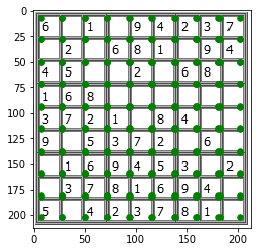

In [30]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
for square in squares_to_nearest_pixel:
    ax.scatter(square.top_left.x, square.top_left.y, color='g', marker="o", s=30)
    ax.scatter(square.bottom_left.x, square.bottom_left.y, color='g', marker="o", s=30)
    ax.scatter(square.top_right.x, square.top_right.y, color='g', marker="o", s=30)
    ax.scatter(square.bottom_right.x, square.bottom_right.y, color='g', marker="o", s=30)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [31]:
cell_ims = []
for square in squares_to_nearest_pixel:
    cell_ims.append(sudoku_board_img_bw[square.top_left.x:square.top_right.x,
           square.top_left.y:square.bottom_left.y])

In [32]:
type(sudoku_board_img_bw)

imageio.core.util.Array

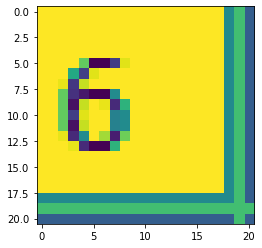

In [33]:
plt.imshow(sudoku_board_img_bw[squares_to_nearest_pixel[0].top_left.x:squares_to_nearest_pixel[0].top_right.x,
           squares_to_nearest_pixel[0].top_left.y:squares_to_nearest_pixel[0].bottom_left.y])

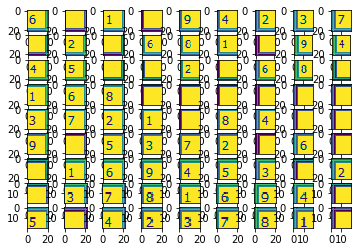

In [34]:
for idx, cell in enumerate(cell_ims):
    plt.subplot(9, 9, idx + 1)
    plt.imshow(cell)

#### FINALLY!!!!!!  nOW WE NEED TO WORK ON MACHINE LEARNING TO READ THE DIGITS!!!

In [35]:
# `images` and `labels` are the training set images and their labels
from sklearn import svm
clf = svm.SVC()
clf.fit(images[:100], labels[:100])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
clf.predict([images[101]])

array([7], dtype=uint8)

In [38]:
labels[101]

7

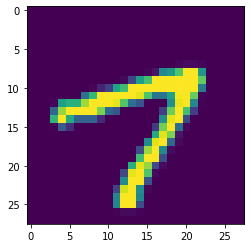

In [46]:
im1_arr = []
for row in range(28):
    im1_arr.append([])
    for col in range(28):
        try:
            im1_arr[row].append(images[101][row * 28 + col])
        except:
            print(f"row: {row}    col: {col}")
img_arr = np.array(im1_arr)            
plt.imshow(img_arr)

In [51]:
cell_ims[0].flatten()

Array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 122, 178,  76, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       122, 178,  76, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 122, 178,  76, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 122, 178,  76, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 122, 178,
        76, 255, 255, 255, 255, 194,   0,   0,  47, 244, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 122, 178,  76, 255, 255, 255, 154,
        47, 244, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 122, 178,  76, 255, 255, 247,  41, 233, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 122, 178,  76, 255,
       255, 194,  36,  16,   0,   0, 123, 255, 255, 255, 255, 25

In [50]:
images[101]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 7,
 7,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 13,
 120,
 137,
 186,
 254,
 254,
 136,

In [ ]:
np.m

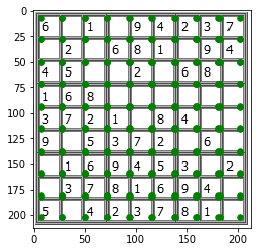

In [47]:
fig, ax = plt.subplots()
ax.imshow(sudoku_board_img_bw, cmap=plt.cm.gray)
for square in squares_to_nearest_pixel:
    ax.scatter(square.top_left.x, square.top_left.y, color='g', marker="o", s=30)
    ax.scatter(square.bottom_left.x, square.bottom_left.y, color='g', marker="o", s=30)
    ax.scatter(square.top_right.x, square.top_right.y, color='g', marker="o", s=30)
    ax.scatter(square.bottom_right.x, square.bottom_right.y, color='g', marker="o", s=30)
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()

In [52]:
for square in cell_ims:
    print(clf.predict([square.flatten()]))

ValueError: X.shape[1] = 441 should be equal to 784, the number of features at training time

In [67]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(np.array(square))


# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

ValueError: Image contains values other than 0 and 1

In [64]:
square = []
prev=0
for num in range(28, len(images[101]) + 1, 28):
    square.append(images[101][prev:num])
    prev = num
print(square)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 13, 120, 137, 186, 254, 254, 136, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 53, 143, 179, 254, 254, 254, 255, 254, 254, 193, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 4, 25, 50, 149, 175, 254, 254, 254, 254, 254, 254, 255, 254, 254, 108, 0, 0, 0, 0,

In [65]:
np.array(square)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [63]:
list(range(1, len(images[101]) + 1, 28))

[1,
 29,
 57,
 85,
 113,
 141,
 169,
 197,
 225,
 253,
 281,
 309,
 337,
 365,
 393,
 421,
 449,
 477,
 505,
 533,
 561,
 589,
 617,
 645,
 673,
 701,
 729,
 757]